In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as fn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.5.1+cpu'

## Data Preparing and Loading

In [2]:
weight= 0.7
bias=  0.6
start =0
end = 20

step = 0.23
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias

In [3]:
x.shape

torch.Size([87, 1])

In [4]:
len(x),len(y)

(87, 87)

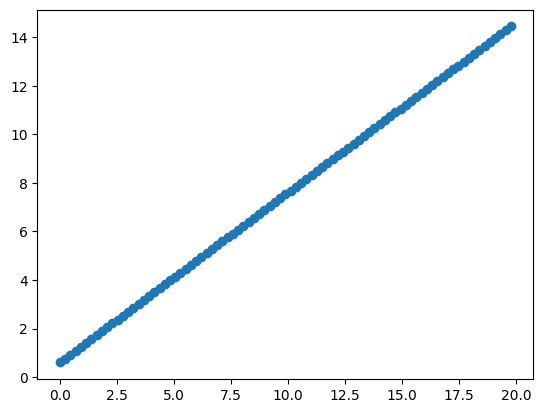

In [5]:
plt.scatter(x,y)

# spliting data into train and test set

In [6]:
train_ratio= int(0.8 * len(x)) # 0.8 --> 80 % of data use in train data
x_train, y_train = x[:train_ratio],y[:train_ratio]
x_test,y_test= x[train_ratio:], y[train_ratio:]

In [7]:
len(x_train),len(y_train)

(69, 69)

In [8]:
len(x_test) ,len(y_test)

(18, 18)

In [9]:
def plot_pred(train_data,train_labels, test_data,test_label,pred =None):
   plt.figure(figsize=(15,8))
   plt.scatter(train_data,train_labels,c='b',s=4,label='Traning data') # plot train data
   plt.scatter(test_data,test_label,c='g',s=4,label='Testing data') # plot test data
   if pred is not None:
      plt.scatter(test_data,pred,c='r',label='Prediction')
   plt.legend(prop={'size':14})

# Build Model

In [10]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) #
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float),
                                    requires_grad=True)
    def forward(self, x:torch.tensor):
         return self.weight * x + self.bias

In [11]:
torch.manual_seed(42) ## randomly intialize parameters

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# list of parameters name
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# make prediction with model
with torch.inference_mode():
    y_preds = model_0(x_test)

In [14]:
y_preds

tensor([[5.4721],
        [5.5495],
        [5.6270],
        [5.7044],
        [5.7818],
        [5.8593],
        [5.9367],
        [6.0142],
        [6.0916],
        [6.1690],
        [6.2465],
        [6.3239],
        [6.4014],
        [6.4788],
        [6.5562],
        [6.6337],
        [6.7111],
        [6.7885]])

In [15]:
# predict with older method
with torch.no_grad():
    y_preds = model_0(x_test)

In [16]:
y_preds

tensor([[5.4721],
        [5.5495],
        [5.6270],
        [5.7044],
        [5.7818],
        [5.8593],
        [5.9367],
        [6.0142],
        [6.0916],
        [6.1690],
        [6.2465],
        [6.3239],
        [6.4014],
        [6.4788],
        [6.5562],
        [6.6337],
        [6.7111],
        [6.7885]])

In [17]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 18
Number of predictions made: 18
Predicted values:
tensor([[5.4721],
        [5.5495],
        [5.6270],
        [5.7044],
        [5.7818],
        [5.8593],
        [5.9367],
        [6.0142],
        [6.0916],
        [6.1690],
        [6.2465],
        [6.3239],
        [6.4014],
        [6.4788],
        [6.5562],
        [6.6337],
        [6.7111],
        [6.7885]])


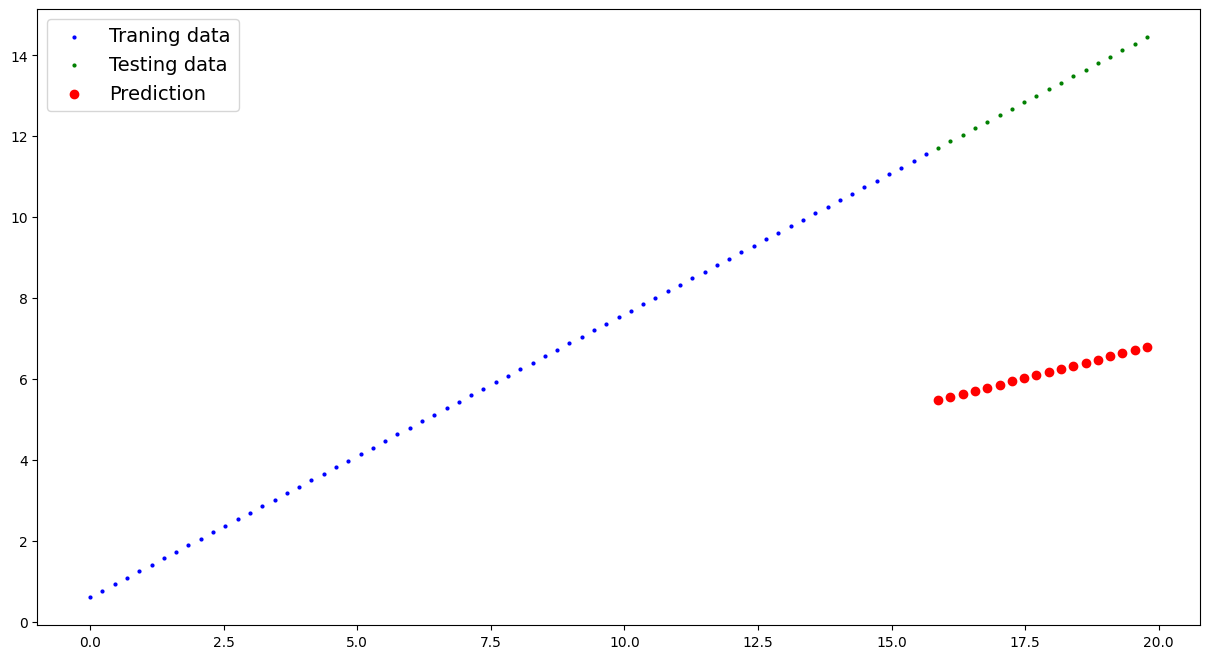

In [18]:
plot_pred(x_train, y_train, x_test, y_test,y_preds)

# Train Model

In [19]:
## Create Loss Function
### MAE or L1 loss
loss_fn = nn.L1Loss()

# optimizer

optimizer = torch.optim.SGD(
    model_0.parameters() , # providing target parameters
    lr=0.01
)

In [20]:
epochs = 100

train_loss_values =[]
test_loss_values= []
epoch_count = []

for epoch in range(epochs):
    # training 
    model_0.train()
    
	 # forward pass 
    y_pred = model_0(x_train)

    loss = loss_fn(y_pred,y_train)   # loss calculation
    optimizer.zero_grad() # start with o gradient
    loss.backward() # loss backward
    optimizer.step() # updating weights and bias
    
    model_0.eval()
    with torch.inference_mode():
       test_pred = model_0(x_test)
       test_loss = loss_fn(test_pred,y_test.type(torch.float))
       if epoch % 10 ==0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
	

Epoch: 0 | MAE Train Loss: 3.3122718334198 | MAE Test Loss: 5.543269634246826 
Epoch: 10 | MAE Train Loss: 0.44687724113464355 | MAE Test Loss: 0.07705625146627426 
Epoch: 20 | MAE Train Loss: 0.2534254491329193 | MAE Test Loss: 0.2652401328086853 
Epoch: 30 | MAE Train Loss: 0.48997437953948975 | MAE Test Loss: 0.11380895227193832 
Epoch: 40 | MAE Train Loss: 0.4635644555091858 | MAE Test Loss: 0.038610830903053284 
Epoch: 50 | MAE Train Loss: 0.4975223243236542 | MAE Test Loss: 0.09630383551120758 
Epoch: 60 | MAE Train Loss: 0.35709792375564575 | MAE Test Loss: 0.22950373589992523 
Epoch: 70 | MAE Train Loss: 0.3349606394767761 | MAE Test Loss: 0.2930060923099518 
Epoch: 80 | MAE Train Loss: 0.4893798828125 | MAE Test Loss: 0.014375792816281319 
Epoch: 90 | MAE Train Loss: 0.4512961208820343 | MAE Test Loss: 0.08896461874246597 


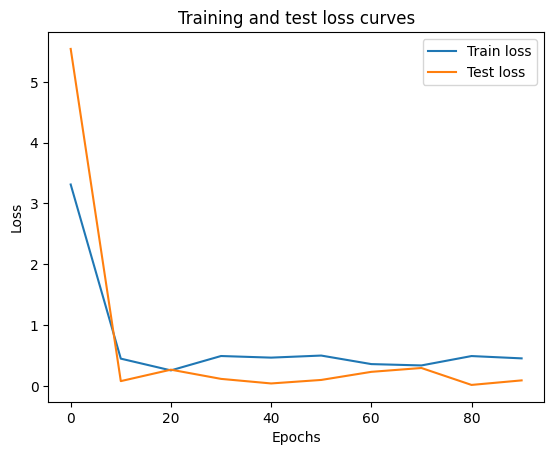

In [21]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [22]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.7738]), 'bias': tensor([0.3934])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.6


# inference

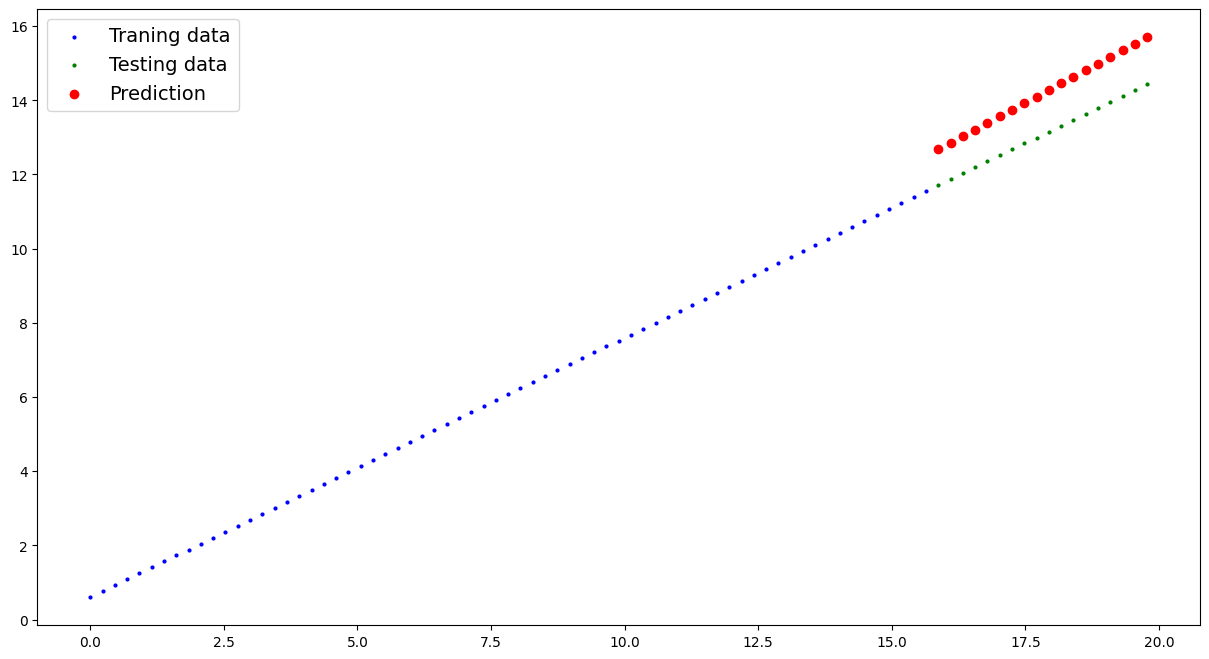

In [23]:
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(x_test)
plot_pred(x_train, y_train, x_test, y_test,y_pred)

# Saving and loading a PyTorch model

In [24]:
from pathlib import Path

model_path = Path('Models')
model_path.mkdir(parents=True,exist_ok=True)


In [25]:
model_name = 'workflow_model.pth'
model_save_path = model_path/ model_name

torch.save(obj=model_0.state_dict(),f=model_save_path)

In [26]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=model_save_path))

C:\Users\www58\AppData\Local\Temp\ipykernel_11116\798725216.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

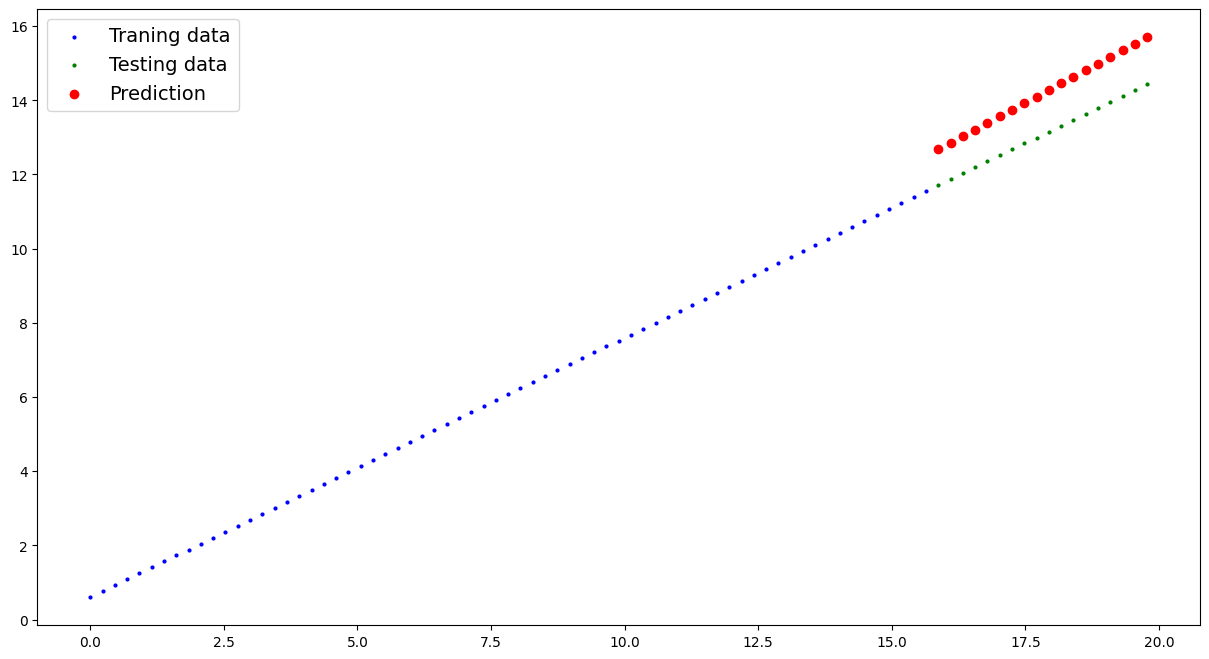

In [27]:
# checking loaded model 
loaded_model.eval()
with torch.inference_mode():
    load_model_pred = loaded_model(x_test)
    
plot_pred(x_train, y_train, x_test, y_test,load_model_pred)

# Putting it all together

## Build Model

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cpu'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
weight= 0.7
bias=  0.6
start =0
end = 50

step = 0.23
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [5]:
len(x_test)

44

In [13]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

model_2 = LinearRegressionV2()
print(model_2)

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [14]:
# checking model device
next(model_2.parameters()).device

device(type='cpu')

In [15]:
# set model to GPU if available
model_2.to(device)
next(model_2.parameters()).device

device(type='cpu')

## Traning

In [16]:
loss_fn= nn.L1Loss()

optimizer = torch.optim.Adam(model_2.parameters(),lr=0.01)

In [17]:
type(x_train)

torch.Tensor

In [29]:
epochs = 1000

train_loss_values =[]
test_loss_values= []
epoch_count = []

for epoch in range(epochs):
    # training 
    model_2.train()
    
	 # forward pass 
    y_pred = model_2(x_train)

    loss = loss_fn(y_pred,y_train)   # loss calculation
    optimizer.zero_grad() # start with o gradient
    loss.backward() # loss backward
    optimizer.step() # updating weights and bias
    
    model_2.eval()
    with torch.inference_mode():
       test_pred = model_2(x_test)
       test_loss = loss_fn(test_pred,y_test.type(torch.float))
       if epoch % 10 ==0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
	

Epoch: 0 | MAE Train Loss: 0.035235773772001266 | MAE Test Loss: 0.053679730743169785 
Epoch: 10 | MAE Train Loss: 0.020354138687253 | MAE Test Loss: 0.005053823813796043 
Epoch: 20 | MAE Train Loss: 0.02967558428645134 | MAE Test Loss: 0.011572783812880516 
Epoch: 30 | MAE Train Loss: 0.035228583961725235 | MAE Test Loss: 0.05366776883602142 
Epoch: 40 | MAE Train Loss: 0.02034442126750946 | MAE Test Loss: 0.005047608632594347 
Epoch: 50 | MAE Train Loss: 0.029669802635908127 | MAE Test Loss: 0.011567429639399052 
Epoch: 60 | MAE Train Loss: 0.03522105515003204 | MAE Test Loss: 0.05365469306707382 
Epoch: 70 | MAE Train Loss: 0.020336534827947617 | MAE Test Loss: 0.005044048652052879 
Epoch: 80 | MAE Train Loss: 0.02966320887207985 | MAE Test Loss: 0.011560157872736454 
Epoch: 90 | MAE Train Loss: 0.03521525114774704 | MAE Test Loss: 0.053645968437194824 
Epoch: 100 | MAE Train Loss: 0.020326105877757072 | MAE Test Loss: 0.0050371126271784306 
Epoch: 110 | MAE Train Loss: 0.0296572651

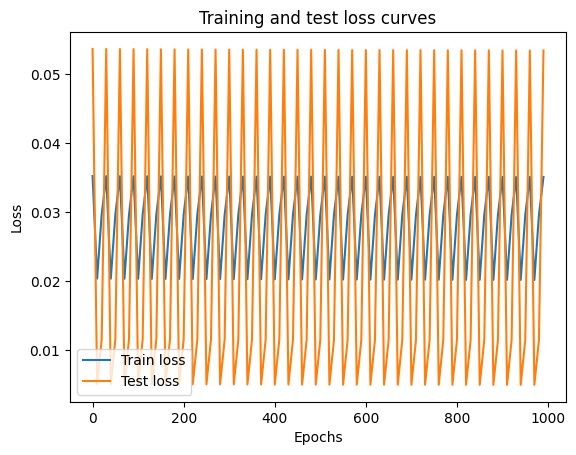

In [30]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [21]:
# find model's learned parameters
from pprint import pprint
print('The model learned the following values for weights and bias:')
pprint(model_2.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6990]])),
             ('linear_layer.bias', tensor([0.6008]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.6


## Infrance

In [31]:
model_2.eval()

# make prediction with old method
with torch.no_grad():
   y_pred = model_2(x_test)


In [32]:
y_pred

tensor([[16.6807],
        [35.1751],
        [22.9527],
        [29.2248],
        [ 3.0108],
        [25.3650],
        [27.9382],
        [12.3385],
        [33.8886],
        [23.1135],
        [30.9938],
        [ 5.4232],
        [34.5319],
        [ 2.0459],
        [11.3736],
        [29.0639],
        [28.4206],
        [ 3.4933],
        [25.5259],
        [11.2127],
        [31.4763],
        [23.5960],
        [13.3034],
        [ 4.6191],
        [18.7714],
        [24.2393],
        [28.9031],
        [ 3.1717],
        [ 7.8355],
        [25.0434],
        [18.1281],
        [ 9.4437],
        [34.8535],
        [31.7979],
        [17.9672],
        [26.6516],
        [12.6601],
        [22.4702],
        [19.7363],
        [33.2453],
        [16.0374],
        [30.3505],
        [19.5755],
        [15.5549]])